In [165]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [166]:
dataset = datasets.load_breast_cancer()

In [167]:
x = np.array([[1,2,3,4],[4,5,6,1],[7,8,9,3]])

In [168]:
y = np.array([[4,1,12,1],[0,2,5,3],[2,1,7,6]])
ytrain = [1,0,1]

In [169]:
dataset = datasets.load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, random_state=1)
print(len(Y_test),len(X_test))

143 143


In [143]:
xdf = pd.DataFrame(data = x)
ydf = pd.DataFrame(data = y)

In [145]:
def distancepd(xtest, xtrain):
    dist = []
    for i in range(len(xtest)):
        dist.append(((((xtest.iloc[i,:-1] - xtrain.iloc[i,:-1])**2)).sum())**0.5)
        #print(xtest.iloc[i,:] - xtrain[i,:-1])
    return dist

In [170]:
def distancenp(xtest, xtrain):
    dist = []
    for i in range(len(xtrain)):
        dist.append(((((xtest - xtrain[i])**2)).sum())**0.5)
        #print(xtest.iloc[i,:] - xtrain[i,:-1])
    return dist

In [171]:
def predict(xtest, xtrain, ytrain, n_nib = 3):
    y_pred = []
    for i in range(len(xtest)):
        dist = distancenp(xtest[i], xtrain)
        dist = np.array(dist)
        dist = dist.argsort()[::-1]
        dist = dist[:n_nib]
        tentative_classes = np.take(ytrain, dist)
        counts = np.bincount(tentative_classes)
        pred_class = np.argmax(counts)
        y_pred.append(pred_class)
    return y_pred

In [172]:
y_pred = predict(X_test, X_train, Y_train)
print(len(y_pred))

143


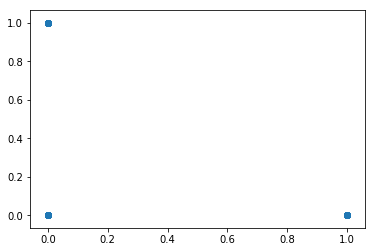

In [173]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, Y_test)
plt.show()